In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tarfile
from six.moves import urllib

In [0]:
## GET the data froom the github
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"


In [0]:
def get_housing_url(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):  # check if there is any folder in your workspace
    os.makedirs(housing_path)  ## if not make the directorry
  
  tgz_path = os.path.join(housing_path,'housing.tgz') ## the path of hr file
  urllib.request.urlretrieve(housing_url,tgz_path)    ## it means extract the file tree from the total url
  housing_tgz = tarfile.open(tgz_path)                ## open the file for extrace
  housing_tgz.extractall(path=housing_path)           ## inside the housing path extrace the file
  housing_tgz.close()                                 ## close the file                           

In [0]:
get_housing_url()

In [0]:
housing = pd.read_csv('datasets/housing/housing.csv')

In [0]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [0]:
## get the descriptions of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [0]:
## total_has missing attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1a855b7b8>,
      dtype=object)

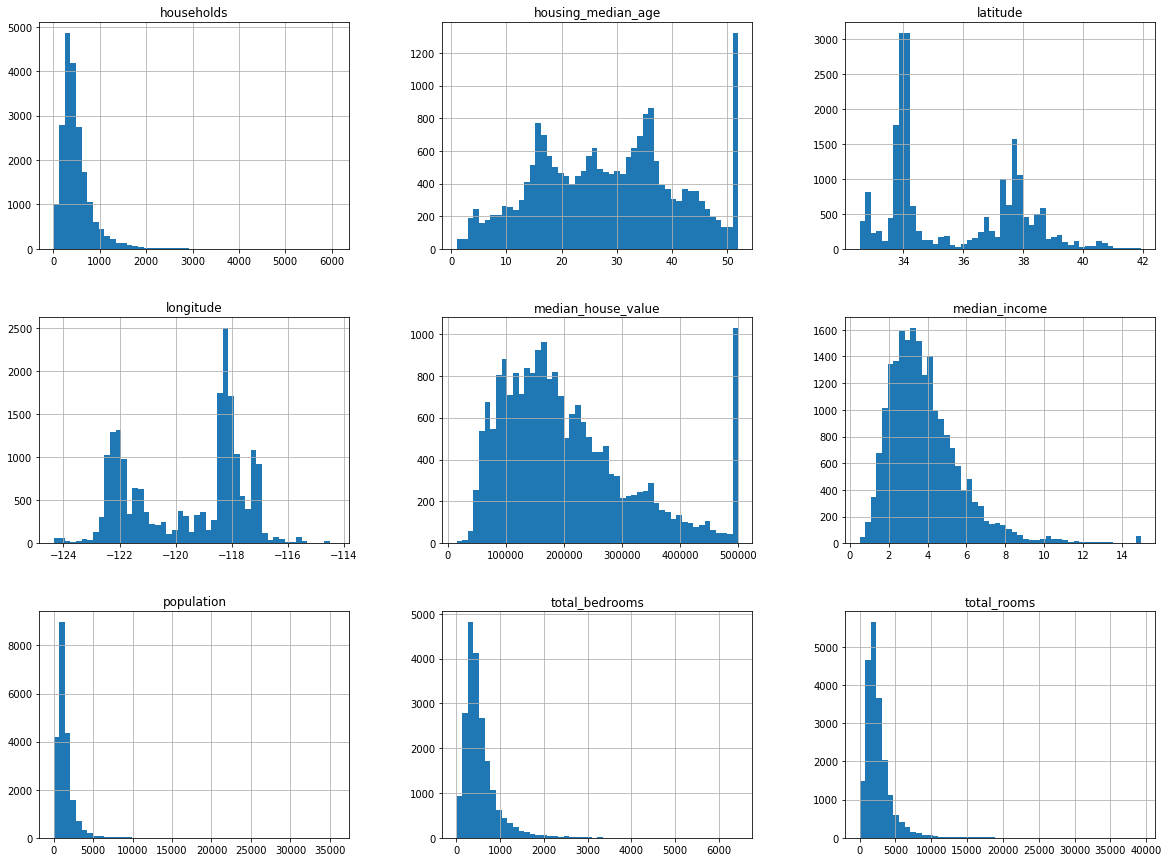

In [0]:
housing.hist(bins=50,figsize=(20,15))

In [0]:
## we need feture scaling 
## and the data are right skewd tail heavy we gonna transform it to a normal distributuion

In [0]:
## split train and test dataset

from sklearn.model_selection import train_test_split

In [0]:
train_set,test_set = train_test_split(housing,test_size=.2)

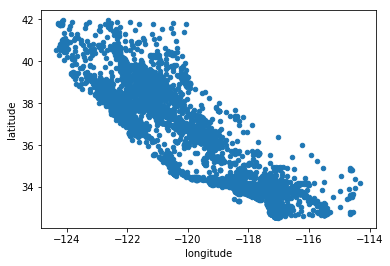

In [0]:
# plotting the geographical information
housing.plot(kind='scatter',x='longitude',y='latitude')

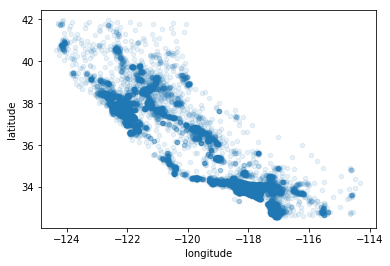

In [0]:
## find all the heavy densed area in the grapg
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

In [0]:
## alpha=.1 is going to show the densed area
## find the correlation in the area
corr_matrix = housing.corr()

In [0]:
corr_matrix  #example are given later

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [0]:
corr_matrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

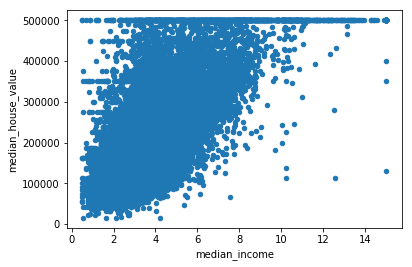

In [0]:
# find the corelation between the income and the house price
housing.plot(kind='scatter',x='median_income',y='median_house_value')

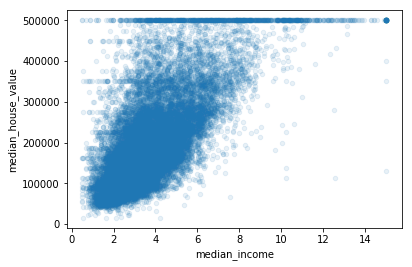

In [0]:
# find the corelation between the income and the house price
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=.1)

In [0]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [0]:
## it shows how much one data is correlated to other
## to see our target median_house_value is how much related to other
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [0]:
## That means the median house is very related with income than total_rooms, and housing_age

In [0]:
## its called pearson coefficient

In [0]:
from pandas.plotting import scatter_matrix
## attr theat related with the most
attr=['median_house_value','median_income','total_rooms','housing_median_age']
#attr = list(housing.columns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc19aeec898>,
      dtype=object)

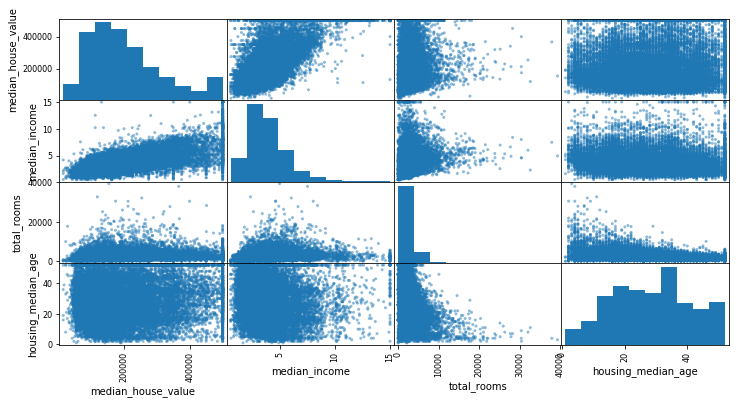

In [0]:
scatter_matrix(housing[attr],figsize=(12,6))

In [0]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [0]:
## again see the coreation of the median_house_value with other
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [0]:
## we can add some normalized coumn that is related with the house_value
##how many bed per rooms
housing['bed_per_rooms'] = housing['total_bedrooms']/housing['total_rooms']
housing['room_per_house'] = housing['total_rooms']/housing['households']
housing['population_per_house'] = housing['population']/housing['households']

In [0]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688075
room_per_house          0.151948
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049686
population_per_house   -0.023737
population             -0.024650
longitude              -0.045967
latitude               -0.144160
bed_per_rooms          -0.255880
Name: median_house_value, dtype: float64

In [0]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bed_per_rooms,room_per_house,population_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,2.181467


In [0]:
feature_matrix = housing.drop('median_house_value',axis=1)
label = housing[['median_house_value']]

In [0]:
housing.isnull().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms          207
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
bed_per_rooms           207
room_per_house            0
population_per_house      0
dtype: int64

In [0]:
## we can drop the total bedrooms but we can find the medican and replace with the medican
##median = housing['total_bedrooms'].median()

In [0]:
##housing['total_bedrooms']=housing['total_bedrooms'].fillna(median)

In [0]:
housing['bed_per_rooms'] = housing['total_bedrooms']/housing['total_rooms']

In [0]:
##housing.isnull().sum()

In [0]:
housing.isnull().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms          207
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
bed_per_rooms           207
room_per_house            0
population_per_house      0
dtype: int64

In [0]:
## but this is not dynamic we have to use the imputer for that
## imputer simply compute the median with other valus
from sklearn.preprocessing import Imputer

In [0]:
imputer = Imputer(strategy='median')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
## gather all the numrical value
numerical_value = housing.drop('ocean_proximity',axis=1)

In [0]:
imputer.fit(numerical_value)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [0]:
X = imputer.transform(numerical_value)

In [0]:
housing_tr = pd.DataFrame(X,columns = numerical_value.columns)

In [0]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bed_per_rooms,room_per_house,population_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.155797,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.129516,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.184458,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.172096,6.281853,2.181467


In [0]:
housing_tr.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
bed_per_rooms           0
room_per_house          0
population_per_house    0
dtype: int64

In [0]:
## we need to label encode the occean proximity and ad it to the feture matrix
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [0]:
ocean_proximity = housing['ocean_proximity']

In [0]:
encoded_proximity = encoder.fit_transform(ocean_proximity)

In [0]:
encoded_proximity

array([3, 3, 3, ..., 1, 1, 1])

In [0]:
ocean_prox = pd.DataFrame(encoded_proximity,columns = ['ocean_proximity'])

In [0]:
ocean_prox.head()

,ocean_proximity
0,3
1,3
2,3
3,3
4,3


In [0]:
housing_tr['ocean_proximity'] = ocean_prox

In [0]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bed_per_rooms,room_per_house,population_per_house,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.146591,6.984127,2.555556,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.155797,6.238137,2.109842,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.129516,8.288136,2.802260,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.184458,5.817352,2.547945,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.172096,6.281853,2.181467,3


In [0]:
## we can use hot encoding also
### we use different type of transformer so we can pipe it to a one class method
## using pipeline so one output of function will be passed to another fnction and after
## all the process finished we get the result

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
## make pipeline 
num_pipeline = Pipeline([('imputer',Imputer(strategy='median')),
                        ('std_sclar',StandardScaler())]
)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
housing_num_tr = num_pipeline.fit_transform(housing_tr)

In [0]:

col = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity', 'bed_per_rooms',
       'room_per_house', 'population_per_house']
housing_tr = pd.DataFrame(housing_num_tr,columns = col)

In [0]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_per_rooms,room_per_house,population_per_house
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,-1.149930,0.628559,-0.049597
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,-0.990381,0.327041,-0.092512
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,-1.445865,1.155620,-0.025843
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,-0.493627,0.156966,-0.050329
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,-0.707889,0.344711,-0.085616


In [0]:
housing_tr.shape

(20640, 12)

In [0]:
label.shape

(20640, 1)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(housing_tr,label)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()

In [0]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
lr.score(x_test,y_test)

1.0

In [0]:
## using rmse for that
from sklearn.metrics import mean_squared_error

In [0]:
prediction=lr.predict(x_test)

In [0]:
lin_mse = mean_squared_error(y_test,prediction)

In [0]:
lin_mse

3.711781272472678e-20

In [0]:
prediction1 = lr.predict(housing_tr)

In [0]:
prediction1

array([[452600.],
       [358500.],
       [352100.],
       ...,
       [ 92300.],
       [ 84700.],
       [ 89400.]])

In [0]:
prediction1 = pd.DataFrame(prediction1,columns = ['prediction1'])

In [0]:
lin_mse = mean_squared_error(label,prediction1)

In [0]:
lin_mse

3.753368579300383e-20